<a href="https://colab.research.google.com/github/TMhdSofyan/Time-Series-Data-Smoothing/blob/main/12_Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.9 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=c7a1ec2bd736ef9e4791af459407b7372908a5dd5d701c16de8efd437855f7fc
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built jcopml


In [2]:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/02_Well_F12H_FIX.csv', sep=';',  parse_dates=['DATE'], index_col='DATE')
df.head()

,WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL
DATE,,,,,,,,,,,
2008-02-12,NO 15/9-F-12 H,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,285,"38,889"
2008-02-13,NO 15/9-F-12 H,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,"1,870","285,246"
2008-02-14,NO 15/9-F-12 H,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,"3,124","509,955"
2008-02-15,NO 15/9-F-12 H,297.663,105.752,180.832,5.264,28.51893,116.831,69.996,84.251,"2,608","383,427"
2008-02-16,NO 15/9-F-12 H,295.936,105.811,180.501,12.385,30.22790,115.434,71.518,82.359,"3,052","418,474"


In [5]:
import pandas as pd

# Replace commas with empty strings in the 'BORE_GAS_VOL' column
df['BORE_OIL_VOL'] = df['BORE_OIL_VOL'].str.replace(',', '')
df['BORE_GAS_VOL'] = df['BORE_GAS_VOL'].str.replace(',', '')

# Convert the 'BORE_GAS_VOL' column to a numeric type
df['BORE_OIL_VOL'] = pd.to_numeric(df['BORE_OIL_VOL'], errors='coerce')
df['BORE_GAS_VOL'] = pd.to_numeric(df['BORE_GAS_VOL'], errors='coerce')

In [6]:
df.drop(columns=['WELL_BORE_CODE', 'AVG_CHOKE_SIZE_P', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
                 'DP_CHOKE_SIZE', 'BORE_GAS_VOL'], inplace = True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(13,10))
plt.savefig('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/SMARTWELL_HISTPLOT.png', dpi = 600)

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [8]:
X = df.drop(columns="BORE_OIL_VOL")
y = df.BORE_OIL_VOL

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2139, 4), (917, 4), (2139,), (917,))

In [ ]:
X.columns

Index(['AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P', 'AVG_WHT_P'], dtype='object')

In [59]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X.columns )])

from sklearn.svm import SVR
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_SVM1 = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_SVM1.fit(X_train, y_train)

print(model_SVM1.best_params_)
print(model_SVM1.score(X_train, y_train), model_SVM1.best_score_, model_SVM1.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 42.42502238267331, 'algo__gamma': 0.0027814285643757547}
0.888551005929705 0.8647018763392342 0.8912340076781218


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


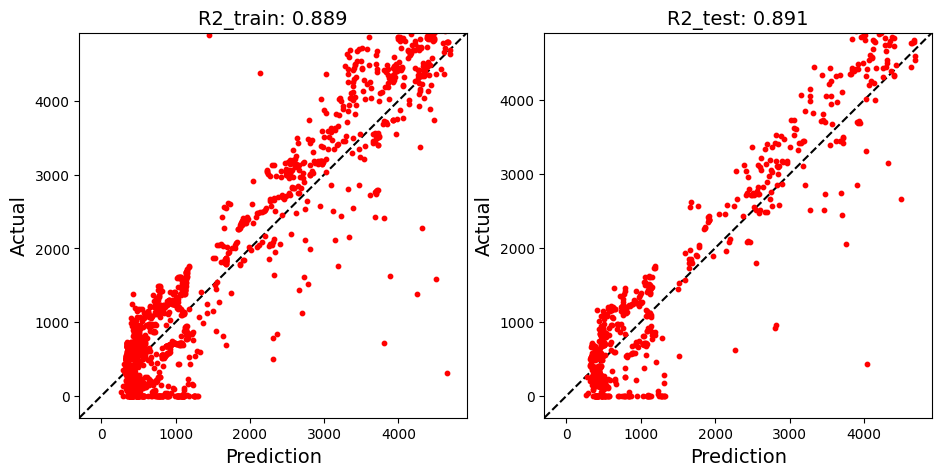

In [22]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_SVM1)
plt.savefig(f'/content/drive/MyDrive/01_Project_Reservoir_Description/Data/SVM_Before_MA_NEW.png', dpi=300, bbox_inches='tight')

#Moving Average#


##AVG_WHT_P##

In [ ]:
windows = [5, 10, 15, 20, 25, 30]

for w in windows:
    # create a new figure for each window size
    plt.figure(figsize=(15, 8))
    
    # calculate rolling mean
    rolling_mean = df.rolling(window=w).mean()
    
    # plot scatter of original data
    plt.scatter(df.index, df['AVG_WHT_P'], label='Original Data', s=10)
    
    # plot line of rolling mean
    plt.plot(rolling_mean.index, rolling_mean['AVG_WHT_P'], label=f'Rolling Mean ({w} days)', linewidth=2.5, color='red')
    
    # set plot title and labels
    plt.xlabel('DATE')
    plt.ylabel('AVG_WHT_P')
    plt.title(f'Rolling Mean ({w} days)')
    plt.legend()
    

    # save plot to file
    plt.savefig(f'/content/drive/MyDrive/01_Project_Reservoir_Description/Data/Rolling Mean ({w} days_WHT).png', dpi=300, bbox_inches='tight')
    
    # show plot
    plt.show()

In [10]:

windows = [5, 10, 15, 20, 25, 30]

rolling_means = pd.DataFrame()
for w in windows:
    # calculate rolling mean
    rolling_mean = df['AVG_WHT_P'].rolling(window=w).mean()
    rolling_means[f'Rolling Mean ({w} days)'] = rolling_mean
    
# concatenate rolling_means with the original data
moving_average1 = pd.concat([df, rolling_means], axis=1)

In [ ]:

moving_average1.head()

,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,Rolling Mean (5 days),Rolling Mean (10 days),Rolling Mean (15 days),Rolling Mean (20 days),Rolling Mean (25 days),Rolling Mean (30 days)
DATE,,,,,,,,,,,
2008-02-12,201.250,18.640,106.806,16.295,285,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-13,182.145,16.467,120.889,53.374,1870,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-14,181.868,12.660,113.718,72.738,3124,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-15,180.832,5.264,116.831,69.996,2608,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-16,180.501,12.385,115.434,71.518,3052,56.7842,NaN,NaN,NaN,NaN,NaN


In [11]:
moving_average1 = moving_average1.rename(columns={'Rolling Mean (30 days)': 'AVG_WHT_P_MA'})

##AVG_DP_Tubing##

In [ ]:
windows = [5, 10, 15, 20, 25, 30]

for w in windows:
    # create a new figure for each window size
    plt.figure(figsize=(15, 8))
    
    # calculate rolling mean
    rolling_mean = df.rolling(window=w).mean()
    
    # plot scatter of original data
    plt.scatter(df.index, df['AVG_DP_TUBING'], label='Original Data', s=10)
    
    # plot line of rolling mean
    plt.plot(rolling_mean.index, rolling_mean['AVG_DP_TUBING'], label=f'Rolling Mean ({w} days)', linewidth=2.5, color='red')
    
    # set plot title and labels
    plt.xlabel('DATE')
    plt.ylabel('AVG_DP_TUBING')
    plt.title(f'Rolling Mean ({w} days)')
    plt.legend()
    

    # save plot to file
    plt.savefig(f'/content/drive/MyDrive/01_Project_Reservoir_Description/Data/Rolling Mean ({w} days_Tubing).png', dpi=300, bbox_inches='tight')
    
    # show plot
    plt.show()

In [12]:
windows = [5, 10, 15, 20, 25, 30]

rolling_means = pd.DataFrame()
for w in windows:
    # calculate rolling mean
    rolling_mean = df['AVG_DP_TUBING'].rolling(window=w).mean()
    rolling_means[f'Rolling Mean ({w} days)'] = rolling_mean
    
# concatenate rolling_means with the original data
moving_average2 = pd.concat([df, rolling_means], axis=1)

In [13]:
moving_average2 = moving_average2.rename(columns={'Rolling Mean (30 days)': 'AVG_DP_TUBING_MA'})

In [ ]:
moving_average2.head()

,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,Rolling Mean (5 days),Rolling Mean (10 days),Rolling Mean (15 days),Rolling Mean (20 days),Rolling Mean (25 days),AVG_DP_TUBING_MA
DATE,,,,,,,,,,,
2008-02-12,201.250,18.640,106.806,16.295,285,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-13,182.145,16.467,120.889,53.374,1870,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-14,181.868,12.660,113.718,72.738,3124,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-15,180.832,5.264,116.831,69.996,2608,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-16,180.501,12.385,115.434,71.518,3052,185.3192,NaN,NaN,NaN,NaN,NaN


#Prediksi After Moving Average#

In [14]:
new_df = pd.concat([df, moving_average1[['AVG_WHT_P_MA']], moving_average2[['AVG_DP_TUBING_MA']]], axis=1)

In [15]:
new_df.drop(columns=['AVG_DP_TUBING', 'AVG_WHT_P'], inplace = True)

In [16]:
new_df.head()

,AVG_ANNULUS_PRESS,AVG_WHP_P,BORE_OIL_VOL,AVG_WHT_P_MA,AVG_DP_TUBING_MA
DATE,,,,,
2008-02-12,18.640,106.806,285,NaN,NaN
2008-02-13,16.467,120.889,1870,NaN,NaN
2008-02-14,12.660,113.718,3124,NaN,NaN
2008-02-15,5.264,116.831,2608,NaN,NaN
2008-02-16,12.385,115.434,3052,NaN,NaN


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3056 entries, 2008-02-12 to 2016-09-17
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AVG_ANNULUS_PRESS  3043 non-null   float64
 1   AVG_WHP_P          3056 non-null   float64
 2   BORE_OIL_VOL       3056 non-null   int64  
 3   AVG_WHT_P_MA       3027 non-null   float64
 4   AVG_DP_TUBING_MA   2992 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 143.2 KB


In [ ]:
from jcopml.plot import plot_missing_value

In [ ]:
plot_missing_value(new_df)

In [17]:
X1 = new_df.drop(columns="BORE_OIL_VOL")
y1 = new_df.BORE_OIL_VOL

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((2139, 4), (917, 4), (2139,), (917,))

In [ ]:
X1.columns

Index(['AVG_ANNULUS_PRESS', 'AVG_WHP_P', 'AVG_WHT_P_MA', 'AVG_DP_TUBING_MA'], dtype='object')

In [54]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling = 'standard'), X1.columns )])

from sklearn.svm import SVR
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_SVM2 = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_SVM2.fit(X1_train, y1_train)

print(model_SVM2.best_params_)
print(model_SVM2.score(X1_train, y1_train), model_SVM2.best_score_, model_SVM2.score(X1_test, y1_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 210.51180519608752, 'algo__gamma': 0.68122338968603}
0.8969138104819143 0.8795242501317889 0.8826723962149707


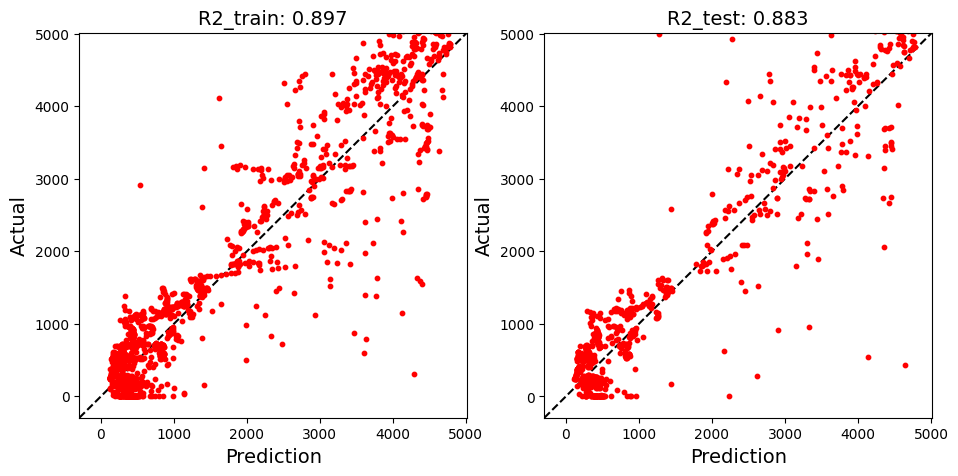

In [58]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual
plot_actual_vs_prediction(X1_train, y1_train, X1_test, y1_test, model_SVM2)
plt.savefig(f'/content/drive/MyDrive/01_Project_Reservoir_Description/Data/SVM_After_MA_NEWEST_STANDARD.png', dpi=300, bbox_inches='tight')

#Savitzky-Golay For Tubing#

In [ ]:
from scipy.signal import savgol_filter

polynomial_values = [1, 2, 3, 4]
window_length = 30

for p in polynomial_values:
    # create a new figure for each polynomial value
    plt.figure(figsize=(15, 8))
    
    # apply Savitzky-Golay filter
    sg = savgol_filter(df['AVG_DP_TUBING'], window_length=window_length, polyorder=p)
    
    # plot scatter of original data
    plt.scatter(df.index, df['AVG_DP_TUBING'], label='Original Data', s=10)
    
    # plot line of filtered data
    plt.plot(df.index, sg, label=f'Savitzky-Golay Filter (polyorder={p}, window_length={window_length})', linewidth=2.5, color='red')
    
    # set plot title and labels
    plt.xlabel('DATE')
    plt.ylabel('AVG_DP_TUBING')
    plt.title(f'Savitzky-Golay Filter (polyorder={p}, window_length={window_length})')
    plt.legend()
    
    # save plot to file
    plt.savefig(f'/content/drive/MyDrive/01_Project_Reservoir_Description/Data/Savitzky-Golay Filter (polyorder={p}, window_length={window_length}).png', dpi=300, bbox_inches='tight')
    
    # show plot
    plt.show()


In [24]:
from scipy.signal import savgol_filter

windows_length = 30
polynomial_values = [1, 2, 3, 4]

savgol_data = pd.DataFrame()

for p in polynomial_values:
    # apply Savitzky-Golay filter
    savgol_result = savgol_filter(df['AVG_DP_TUBING'], window_length=windows_length, polyorder=p, mode='mirror')
    savgol_data[f'Savitzky-Golay ({windows_length} days, {p} polynomial)'] = savgol_result

In [ ]:
savgol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Savitzky-Golay (30 days, 1 polynomial)  3021 non-null   float64
 1   Savitzky-Golay (30 days, 2 polynomial)  3021 non-null   float64
 2   Savitzky-Golay (30 days, 3 polynomial)  3021 non-null   float64
 3   Savitzky-Golay (30 days, 4 polynomial)  3021 non-null   float64
dtypes: float64(4)
memory usage: 95.6 KB


In [ ]:
savgol_data.head()

,"Savitzky-Golay (30 days, 1 polynomial)","Savitzky-Golay (30 days, 2 polynomial)","Savitzky-Golay (30 days, 3 polynomial)","Savitzky-Golay (30 days, 4 polynomial)"
0,180.746000,182.631700,182.631700,183.805827
1,180.733233,182.576189,182.576189,183.646313
2,180.710200,182.458530,182.458530,183.351860
3,180.667200,182.299204,182.299204,182.901822
4,180.615800,182.087172,182.087172,182.321543


In [25]:
savgol_data = savgol_data.fillna(savgol_data.mean())

In [ ]:
savgol_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3056 entries, 2008-02-12 to 2016-09-17
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Savitzky-Golay (30 days, 1 polynomial)  3056 non-null   float64
 1   Savitzky-Golay (30 days, 2 polynomial)  3056 non-null   float64
 2   Savitzky-Golay (30 days, 3 polynomial)  3056 non-null   float64
 3   Savitzky-Golay (30 days, 4 polynomial)  3056 non-null   float64
dtypes: float64(4)
memory usage: 119.4 KB


In [26]:
savgol_data = savgol_data.set_index(df.index)

In [ ]:
savgol_data.head()

,"Savitzky-Golay (30 days, 1 polynomial)","Savitzky-Golay (30 days, 2 polynomial)","Savitzky-Golay (30 days, 3 polynomial)","Savitzky-Golay (30 days, 4 polynomial)"
DATE,,,,
2008-02-12,180.746000,182.631700,182.631700,183.805827
2008-02-13,180.733233,182.576189,182.576189,183.646313
2008-02-14,180.710200,182.458530,182.458530,183.351860
2008-02-15,180.667200,182.299204,182.299204,182.901822
2008-02-16,180.615800,182.087172,182.087172,182.321543


In [27]:
savgol_data = savgol_data.rename(columns={'Savitzky-Golay (30 days, 1 polynomial)': 'AVG_DP_TUBING_SG'})

#Savitzky-Golay for WHT P

In [ ]:
from scipy.signal import savgol_filter

polynomial_values = [1, 2, 3, 4]
window_length = 30

for p in polynomial_values:
    # create a new figure for each polynomial value
    plt.figure(figsize=(15, 8))
    
    # apply Savitzky-Golay filter
    sg = savgol_filter(df['AVG_WHT_P'], window_length=window_length, polyorder=p)
    
    # plot scatter of original data
    plt.scatter(df.index, df['AVG_WHT_P'], label='Original Data', s=10)
    
    # plot line of filtered data
    plt.plot(df.index, sg, label=f'Savitzky-Golay Filter (polyorder={p}, window_length={window_length})', linewidth=2.5, color='red')
    
    # set plot title and labels
    plt.xlabel('DATE')
    plt.ylabel('AVG_WHT_P')
    plt.title(f'Savitzky-Golay Filter (polyorder={p}, window_length={window_length})')
    plt.legend()
    
    # save plot to file
    plt.savefig(f'/content/drive/MyDrive/01_Project_Reservoir_Description/Data/Savitzky-Golay Filter (polyorder={p}, window_length={window_length})AVG_WHT_P.png', dpi=300, bbox_inches='tight')
    
    # show plot
    plt.show()

In [37]:
from scipy.signal import savgol_filter

windows_length = 30
polynomial_values = [1, 2, 3, 4]

savgol_data1 = pd.DataFrame()

for p in polynomial_values:
    # apply Savitzky-Golay filter
    savgol_result = savgol_filter(df['AVG_WHT_P'], window_length=windows_length, polyorder=p)
    savgol_data1[f'Savitzky-Golay ({windows_length} days, {p} polynomial)'] = savgol_result

In [ ]:
savgol_data1.head()

In [39]:
savgol_data1 = savgol_data1.fillna(savgol_data.mean())

In [ ]:
savgol_data1 = savgol_data1.set_index(df.index)
savgol_data1.head()

In [42]:
savgol_data1 = savgol_data1.rename(columns={'Savitzky-Golay (30 days, 1 polynomial)': 'AVG_WHT_P_SG'})

#PREDIKSI AFTER SAVITZKY_GOLAY SMOOTHING

In [43]:
new_df2 = pd.concat([df, savgol_data[['AVG_DP_TUBING_SG']], savgol_data1[['AVG_WHT_P_SG']]], axis=1)

In [ ]:
new_df2.head()

In [ ]:
new_df2.hist(bins=30, figsize=(13,10))

In [44]:
new_df2.drop(columns=['AVG_DP_TUBING', 'AVG_WHT_P'], inplace = True)

In [ ]:
new_df2.head()

,AVG_ANNULUS_PRESS,AVG_WHP_P,BORE_OIL_VOL,AVG_DP_TUBING_SG,AVG_WHT_P_SG
DATE,,,,,
2008-02-12,18.640,106.806,285,180.746000,63.030839
2008-02-13,16.467,120.889,1870,180.733233,63.545588
2008-02-14,12.660,113.718,3124,180.710200,64.060337
2008-02-15,5.264,116.831,2608,180.667200,64.575086
2008-02-16,12.385,115.434,3052,180.615800,65.089835


In [ ]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3056 entries, 2008-02-12 to 2016-09-17
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AVG_ANNULUS_PRESS  3043 non-null   float64
 1   AVG_WHP_P          3056 non-null   float64
 2   BORE_OIL_VOL       3056 non-null   int64  
 3   AVG_DP_TUBING_SG   3056 non-null   float64
 4   AVG_WHT_P_SG       3056 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 207.8 KB


In [47]:
X1 = new_df2.drop(columns="BORE_OIL_VOL")
y1 = new_df2.BORE_OIL_VOL

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((2139, 4), (917, 4), (2139,), (917,))

In [48]:
X1.head()

,AVG_ANNULUS_PRESS,AVG_WHP_P,AVG_DP_TUBING_SG,AVG_WHT_P_SG
DATE,,,,
2008-02-12,18.640,106.806,180.746000,63.030839
2008-02-13,16.467,120.889,180.733233,63.545588
2008-02-14,12.660,113.718,180.710200,64.060337
2008-02-15,5.264,116.831,180.667200,64.575086
2008-02-16,12.385,115.434,180.615800,65.089835


In [53]:

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling = 'standard'), X1.columns )])

from sklearn.svm import SVR
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_SVM2 = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_SVM2.fit(X1_train, y1_train)

print(model_SVM2.best_params_)
print(model_SVM2.score(X1_train, y1_train), model_SVM2.best_score_, model_SVM2.score(X1_test, y1_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 210.51180519608752, 'algo__gamma': 0.68122338968603}
0.8969138104819143 0.8795242501317889 0.8826723962149707


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


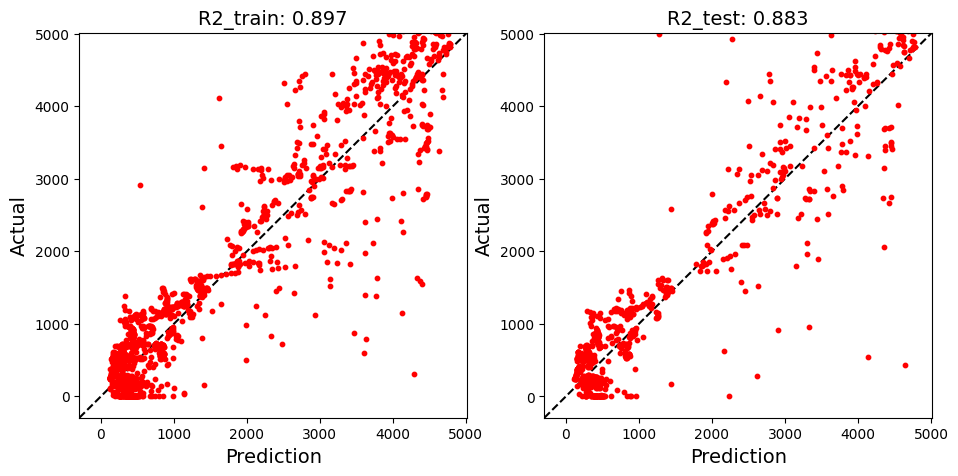

In [60]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual
plot_actual_vs_prediction(X1_train, y1_train, X1_test, y1_test, model_SVM2)
plt.savefig(f'/content/drive/MyDrive/01_Project_Reservoir_Description/Data/SVM_After_SviztkyGolay_NEW_STANDARD.png', dpi=300, bbox_inches='tight')

#**ORIGINAL DATASET VISUALIZATION**#

In [ ]:
import matplotlib.pyplot as plt
df.plot(y='AVG_DOWNHOLE_PRESSURE', figsize=(15, 8), linewidth=2.5, color='red')
plt.xlabel('DATE')
plt.ylabel('AVG_DOWNHOLE_PRESSURE')
plt.title('AVG_DOWNHOLE_PRESSURE vs. DATE')
plt.savefig('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/SMARTWELL_AVG_DOWNHOLE_PRESSURE.png', dpi = 600)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df.plot(y='AVG_DOWNHOLE_TEMPERATURE', figsize=(15, 8), linewidth=2, color='red')
plt.xlabel('DATE')
plt.ylabel('AVG_DOWNHOLE_TEMPERATURE')
plt.title('AVG_DOWNHOLE_TEMPERATURE vs. DATE')
plt.savefig('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/SMARTWELL_AVG_DOWNHOLE_TEMPERATURE.png', dpi = 600)
plt.show()

In [ ]:
for column in df.columns:
    plt.figure(figsize=(15, 8))
    plt.plot(df.index, df[column], linewidth=2.5, color='red')
    plt.xlabel('DATE')
    plt.ylabel(column)
    plt.title(column + ' vs DATE')
    plt.savefig('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/' + column + '.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
for column in df.columns:
    plt.figure(figsize=(15, 8))
    plt.scatter(df.index, df[column], s=10, color='red')
    plt.xlabel('DATE')
    plt.ylabel(column)
    plt.title(column + ' vs DATE')
    plt.savefig('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/' + column + '.png', dpi=300, bbox_inches='tight')
    plt.show()